# Analisis Eksplorasi Data (EDA)

Notebook ini bertujuan untuk melakukan analisis eksplorasi awal pada dataset gambar. Tujuannya adalah untuk memahami distribusi kelas dan melihat contoh gambar dari setiap kategori.

In [3]:
import os
import sys
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import cv2

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.configs.config import DATA_RAW_PATH, CLASSES


## Distribusi Kelas dan Contoh Gambar

Langkah pertama adalah menghitung jumlah gambar di setiap direktori kelas untuk memahami apakah dataset seimbang atau tidak. Kemudian, kita akan menampilkan satu gambar acak dari setiap kelas.

Distribusi Kelas:
{'Berawan': 300, 'Hujan': 300, 'Cerah': 300, 'Berkabut': 300}


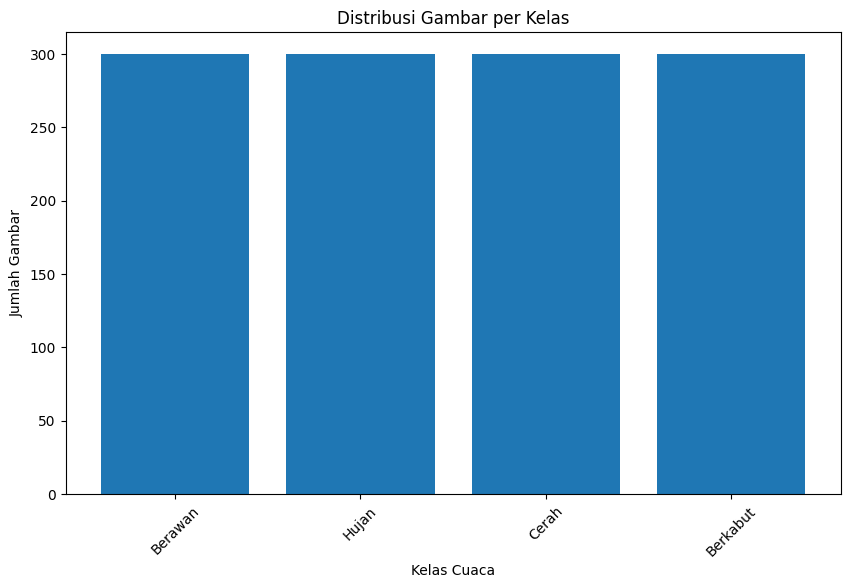

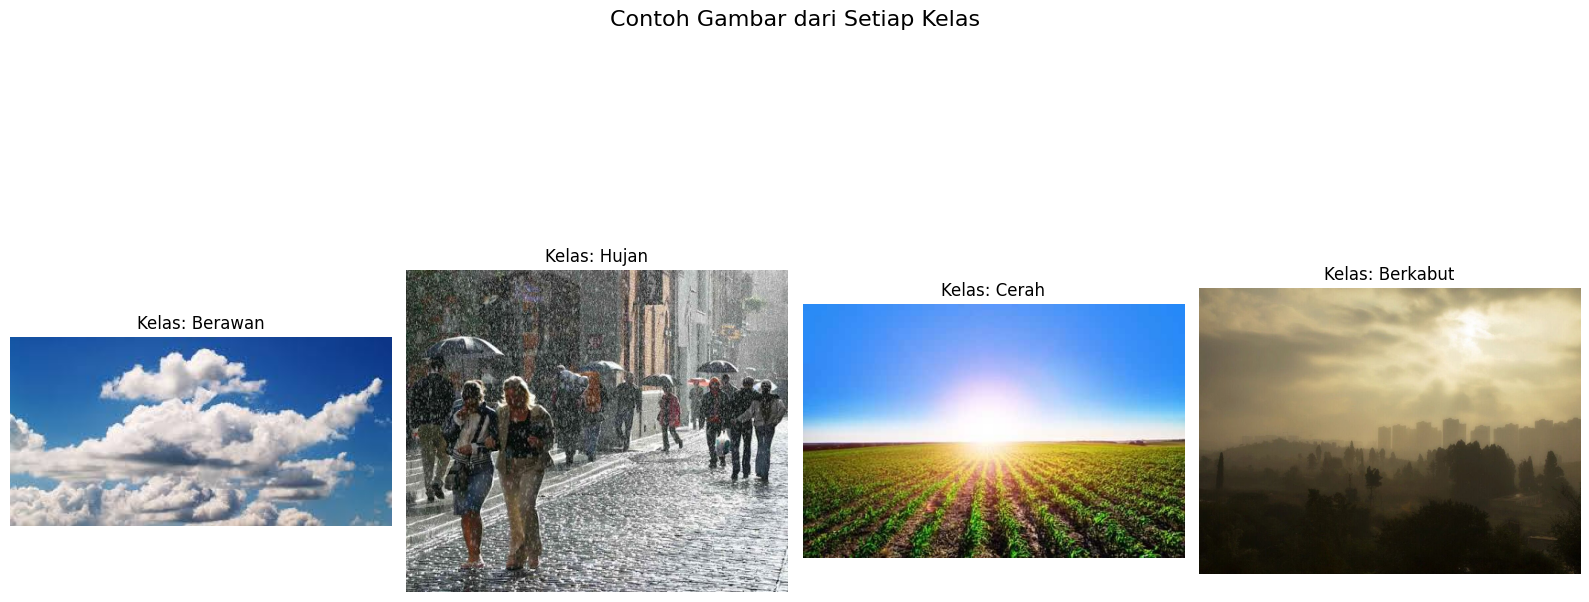

In [4]:
# Inisialisasi dictionary untuk menyimpan jumlah gambar per kelas
class_counts = {}

# Iterasi melalui setiap kelas yang didefinisikan dalam konfigurasi
for class_name in CLASSES:
    # Membuat path lengkap ke direktori kelas
    class_path = os.path.join(DATA_RAW_PATH, class_name)
    
    # Memeriksa apakah path tersebut adalah direktori yang valid
    if os.path.isdir(class_path):
        # Menghitung jumlah file (gambar) dalam direktori dan menyimpannya
        class_counts[class_name] = len(os.listdir(class_path))

# Menampilkan hasil perhitungan distribusi kelas
print("Distribusi Kelas:")
print(class_counts)

# Visualisasi Grafik Distribusi
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Distribusi Gambar per Kelas')
plt.xlabel('Kelas Cuaca')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Contoh Gambar dari Setiap Kelas
num_classes = len(CLASSES)
cols = 4  # Tentukan jumlah kolom untuk subplot
rows = int(np.ceil(num_classes / cols)) # Hitung jumlah baris yang dibutuhkan

# Membuat subplot untuk menampilkan gambar
fig, axs = plt.subplots(rows, cols, figsize=(16, 8))
fig.suptitle('Contoh Gambar dari Setiap Kelas', fontsize=16)

# Iterasi melalui setiap kelas untuk memilih dan menampilkan gambar acak
for i, class_name in enumerate(CLASSES):
    class_path = os.path.join(DATA_RAW_PATH, class_name)
    if not os.path.isdir(class_path): continue
    
    # Pilih nama file gambar secara acak dari direktori kelas
    random_image_name = np.random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, random_image_name)
    
    # Baca gambar dan konversi dari BGR (default OpenCV) ke RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar pada subplot yang sesuai
    ax = axs[i]
    ax.imshow(img_rgb)
    ax.set_title(f'Kelas: {class_name}')
    ax.axis('off')
    
# Sembunyikan sumbu untuk subplot yang tidak terpakai
for j in range(num_classes, rows * cols):
    axs.flatten()[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()